<a href="https://colab.research.google.com/github/RudreshVeerkhare/Data_Science_Lab/blob/main/Kaggle_House_Prices_Measuring_the_Performance_of_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id "1mY0YHdVrVwB00y-Q8qOM8EnP5TjYGfiU" -O "house.zip"
!unzip house.zip

Downloading...
From: https://drive.google.com/uc?id=1mY0YHdVrVwB00y-Q8qOM8EnP5TjYGfiU
To: /content/house.zip
100% 191k/191k [00:00<00:00, 79.6MB/s]
Archive:  house.zip
  inflating: sample_submission.csv   
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style = "white",
    rc = {
        'figure.figsize': (20, 15)
    }
)

In [ ]:
df_org = pd.read_csv('train.csv')
df_org.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values

Analysis of features of missing values

In [ ]:
missing_stats = df_org.isna().sum().sort_values(ascending = False) * 100 / len(df_org)
missing_stats

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

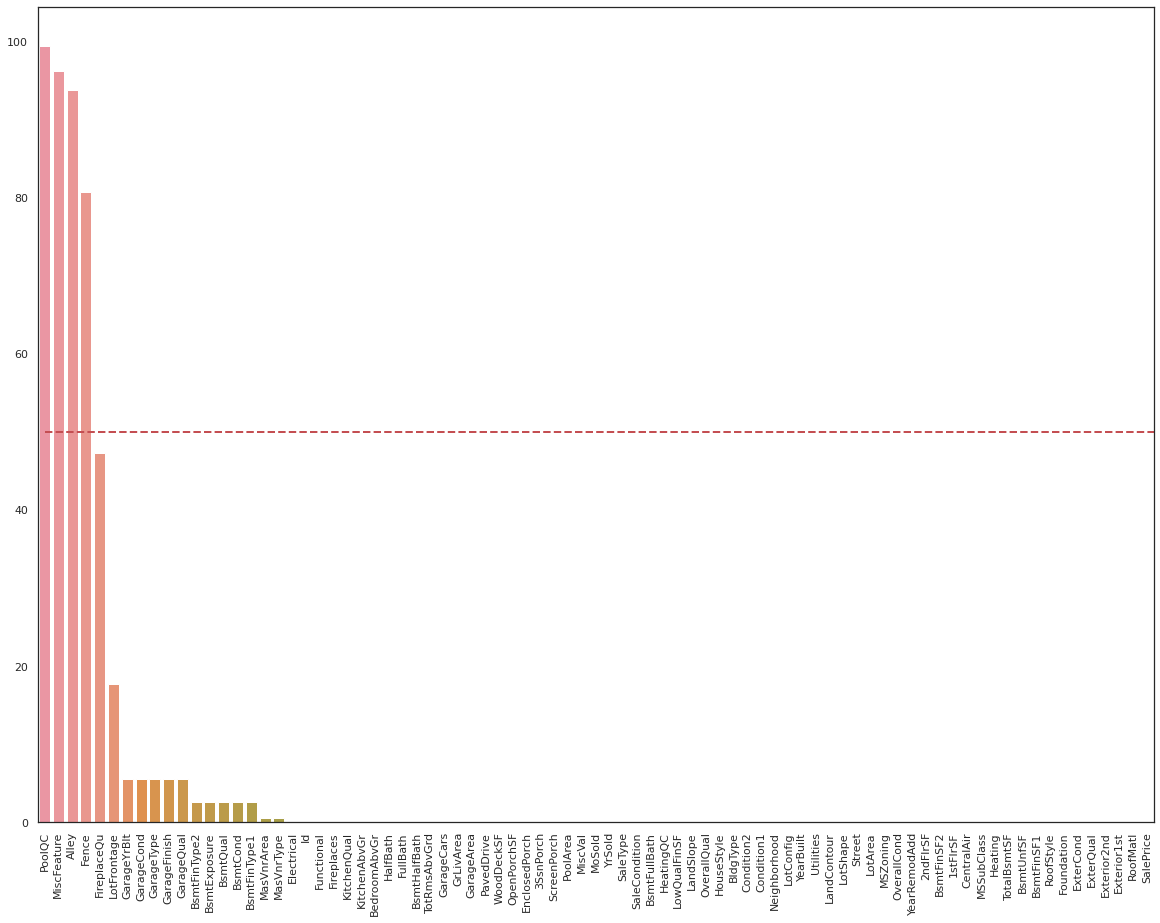

In [ ]:
plt.plot([0, 100], [50,50], 'r--', lw=2)
g = sns.barplot(x = missing_stats.index, y = missing_stats.values)
_ = g.set_xticklabels(missing_stats.index, rotation = 90)

There are some features having more than 50% missing values

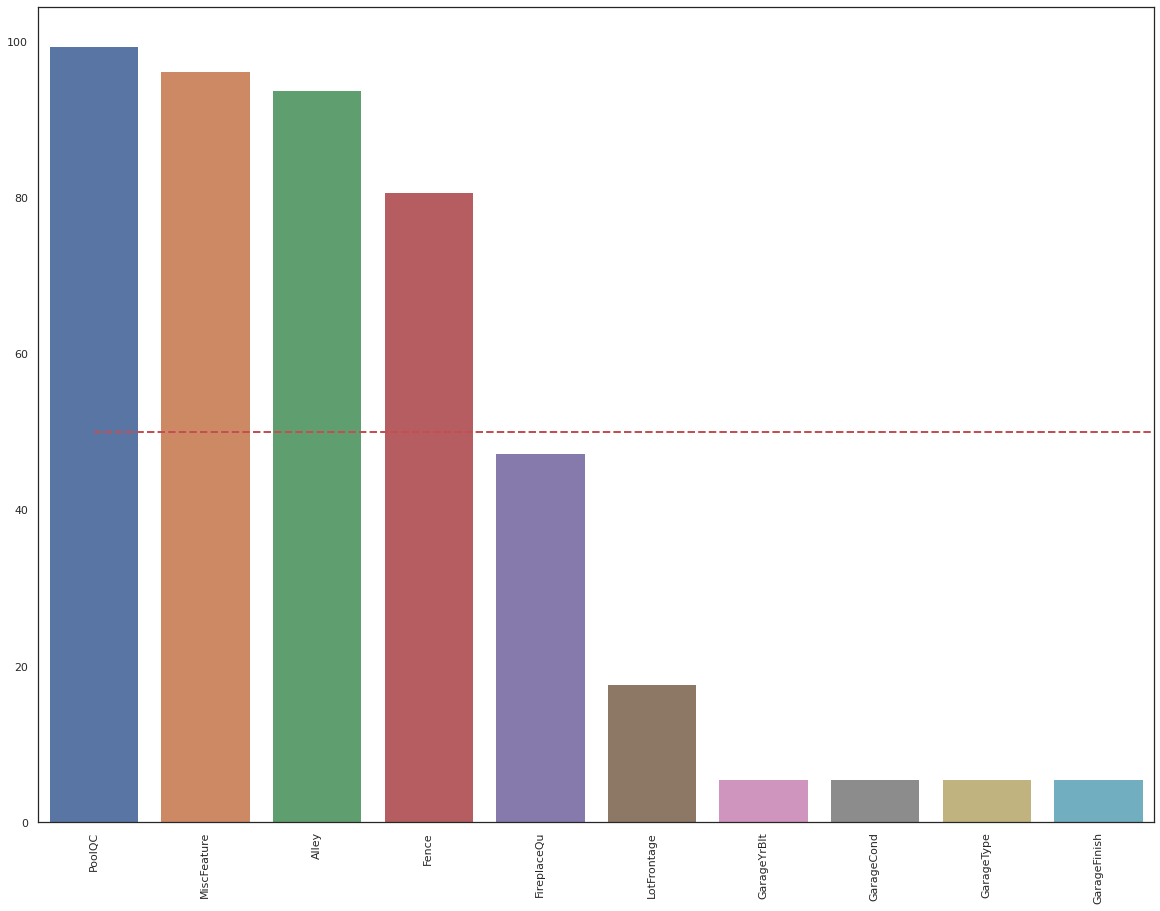

In [ ]:
plt.plot([0, 100], [50,50], 'r--', lw=2)
g = sns.barplot(x = missing_stats[:10].index, y = missing_stats[:10].values)
_ = g.set_xticklabels(missing_stats[:10].index, rotation = 90)

Removing fatures with more than 50% missing values

In [ ]:
df_wip = df_org.drop(missing_stats[missing_stats > 50].index, axis = 1)
print(df_wip.shape)
df_wip.head()

(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
temp = df_wip.dtypes
for name, val in zip(temp.index, temp.values): print(name, "\t", val)

Id 	 int64
MSSubClass 	 int64
MSZoning 	 object
LotFrontage 	 float64
LotArea 	 int64
Street 	 object
LotShape 	 object
LandContour 	 object
Utilities 	 object
LotConfig 	 object
LandSlope 	 object
Neighborhood 	 object
Condition1 	 object
Condition2 	 object
BldgType 	 object
HouseStyle 	 object
OverallQual 	 int64
OverallCond 	 int64
YearBuilt 	 int64
YearRemodAdd 	 int64
RoofStyle 	 object
RoofMatl 	 object
Exterior1st 	 object
Exterior2nd 	 object
MasVnrType 	 object
MasVnrArea 	 float64
ExterQual 	 object
ExterCond 	 object
Foundation 	 object
BsmtQual 	 object
BsmtCond 	 object
BsmtExposure 	 object
BsmtFinType1 	 object
BsmtFinSF1 	 int64
BsmtFinType2 	 object
BsmtFinSF2 	 int64
BsmtUnfSF 	 int64
TotalBsmtSF 	 int64
Heating 	 object
HeatingQC 	 object
CentralAir 	 object
Electrical 	 object
1stFlrSF 	 int64
2ndFlrSF 	 int64
LowQualFinSF 	 int64
GrLivArea 	 int64
BsmtFullBath 	 int64
BsmtHalfBath 	 int64
FullBath 	 int64
HalfBath 	 int64
BedroomAbvGr 	 int64
KitchenAbvGr 	 int64


In [ ]:
# remove ID
df_wip.drop('Id', axis = 1, inplace = True)

Still there are many missing values

Categorical => replace with Mode  
Numerical => replace with Mean

**Categorical Data**

Unique values of categorical features

In [ ]:
for colname in df_wip.columns[df_wip.dtypes == "object"]:
    print(colname, "\t", df_wip[colname].unique())

MSZoning 	 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 	 ['Pave' 'Grvl']
LotShape 	 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 	 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 	 ['AllPub' 'NoSeWa']
LotConfig 	 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 	 ['Gtl' 'Mod' 'Sev']
Neighborhood 	 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 	 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 	 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 	 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 	 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 	 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 	 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st 	 ['VinylSd' 'Meta

Impute Categotical features with Mode

In [ ]:
for colname in df_wip.columns[df_wip.dtypes == "object"]:
    _mode = df_wip[colname].mode()[0]
    print(colname, "\t", _mode, "\t", df_wip[colname].isna().sum())
    df_wip[colname] = df_wip[colname].fillna(_mode)

MSZoning 	 RL 	 0
Street 	 Pave 	 0
LotShape 	 Reg 	 0
LandContour 	 Lvl 	 0
Utilities 	 AllPub 	 0
LotConfig 	 Inside 	 0
LandSlope 	 Gtl 	 0
Neighborhood 	 NAmes 	 0
Condition1 	 Norm 	 0
Condition2 	 Norm 	 0
BldgType 	 1Fam 	 0
HouseStyle 	 1Story 	 0
RoofStyle 	 Gable 	 0
RoofMatl 	 CompShg 	 0
Exterior1st 	 VinylSd 	 0
Exterior2nd 	 VinylSd 	 0
MasVnrType 	 None 	 8
ExterQual 	 TA 	 0
ExterCond 	 TA 	 0
Foundation 	 PConc 	 0
BsmtQual 	 TA 	 37
BsmtCond 	 TA 	 37
BsmtExposure 	 No 	 38
BsmtFinType1 	 Unf 	 37
BsmtFinType2 	 Unf 	 38
Heating 	 GasA 	 0
HeatingQC 	 Ex 	 0
CentralAir 	 Y 	 0
Electrical 	 SBrkr 	 1
KitchenQual 	 TA 	 0
Functional 	 Typ 	 0
FireplaceQu 	 Gd 	 690
GarageType 	 Attchd 	 81
GarageFinish 	 Unf 	 81
GarageQual 	 TA 	 81
GarageCond 	 TA 	 81
PavedDrive 	 Y 	 0
SaleType 	 WD 	 0
SaleCondition 	 Normal 	 0


**Numerical Data**

In [ ]:
for colname in df_wip.columns[df_wip.dtypes != "object"]:
    _mean = df_wip[colname].mean()
    print(colname, "\t\t", _mode, "\t", df_wip[colname].isna().sum())
    df_wip[colname] = df_wip[colname].fillna(_mean)

MSSubClass 		 180921.19589041095 	 0
LotFrontage 		 180921.19589041095 	 259
LotArea 		 180921.19589041095 	 0
OverallQual 		 180921.19589041095 	 0
OverallCond 		 180921.19589041095 	 0
YearBuilt 		 180921.19589041095 	 0
YearRemodAdd 		 180921.19589041095 	 0
MasVnrArea 		 180921.19589041095 	 8
BsmtFinSF1 		 180921.19589041095 	 0
BsmtFinSF2 		 180921.19589041095 	 0
BsmtUnfSF 		 180921.19589041095 	 0
TotalBsmtSF 		 180921.19589041095 	 0
1stFlrSF 		 180921.19589041095 	 0
2ndFlrSF 		 180921.19589041095 	 0
LowQualFinSF 		 180921.19589041095 	 0
GrLivArea 		 180921.19589041095 	 0
BsmtFullBath 		 180921.19589041095 	 0
BsmtHalfBath 		 180921.19589041095 	 0
FullBath 		 180921.19589041095 	 0
HalfBath 		 180921.19589041095 	 0
BedroomAbvGr 		 180921.19589041095 	 0
KitchenAbvGr 		 180921.19589041095 	 0
TotRmsAbvGrd 		 180921.19589041095 	 0
Fireplaces 		 180921.19589041095 	 0
GarageYrBlt 		 180921.19589041095 	 81
GarageCars 		 180921.19589041095 	 0
GarageArea 		 180921.195890410

In [ ]:
df_wip.isna().any().any()

False

This means no missing values are remaning 

### Label Encoding

For categorical features, we can either encode using LabelEncoder or OneHotEncoder

In [ ]:
(df_wip.dtypes == "object").sum()

39

we have to total **39** categorical features, So we will use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)

In [ ]:
df_wip[df_wip.columns[df_wip.dtypes == "object"]] = df_wip[df_wip.columns[df_wip.dtypes == "object"]].apply(lambda x: d[x.name].fit_transform(x))

### Base Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()
x = df_wip.drop("SalePrice", axis = 1)
_y = df_wip["SalePrice"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


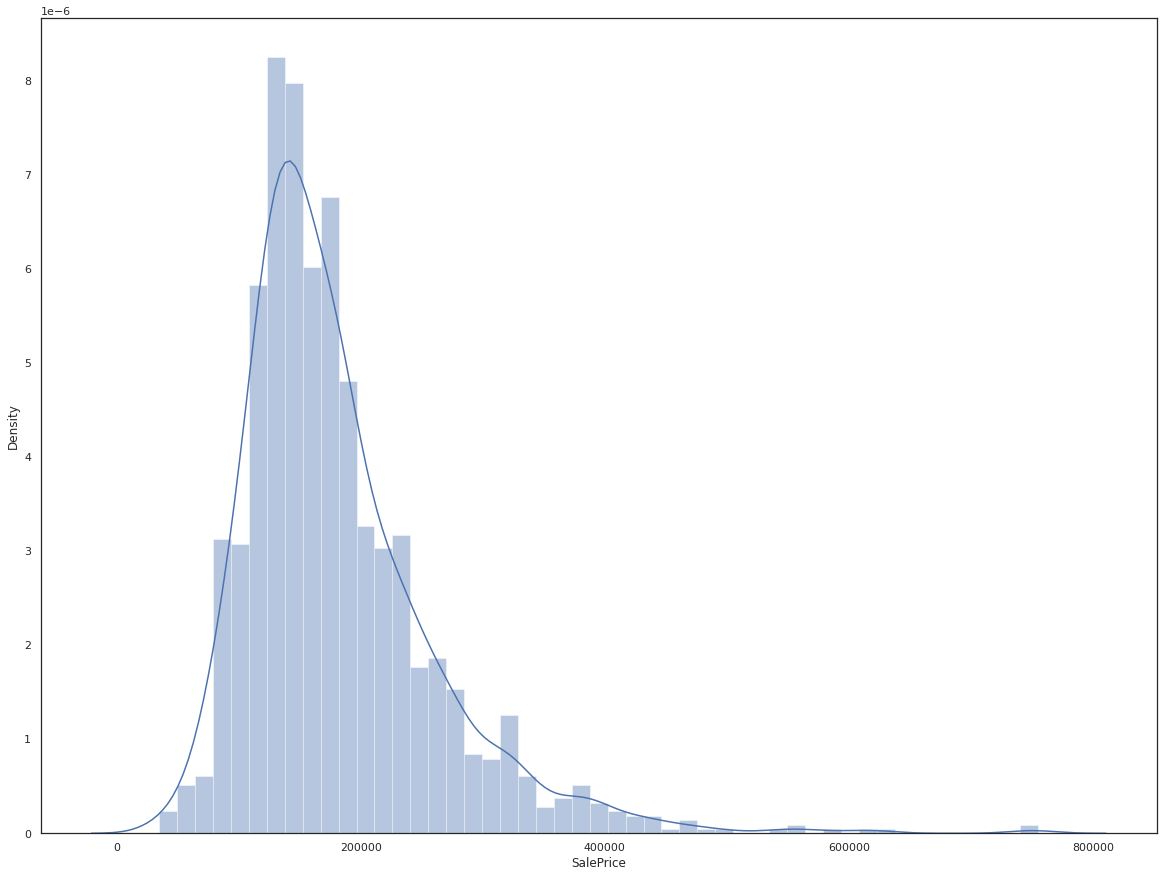

In [ ]:
sns.distplot(_y)

In [ ]:
from scipy.stats import boxcox

y, LAMBDA = boxcox(_y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


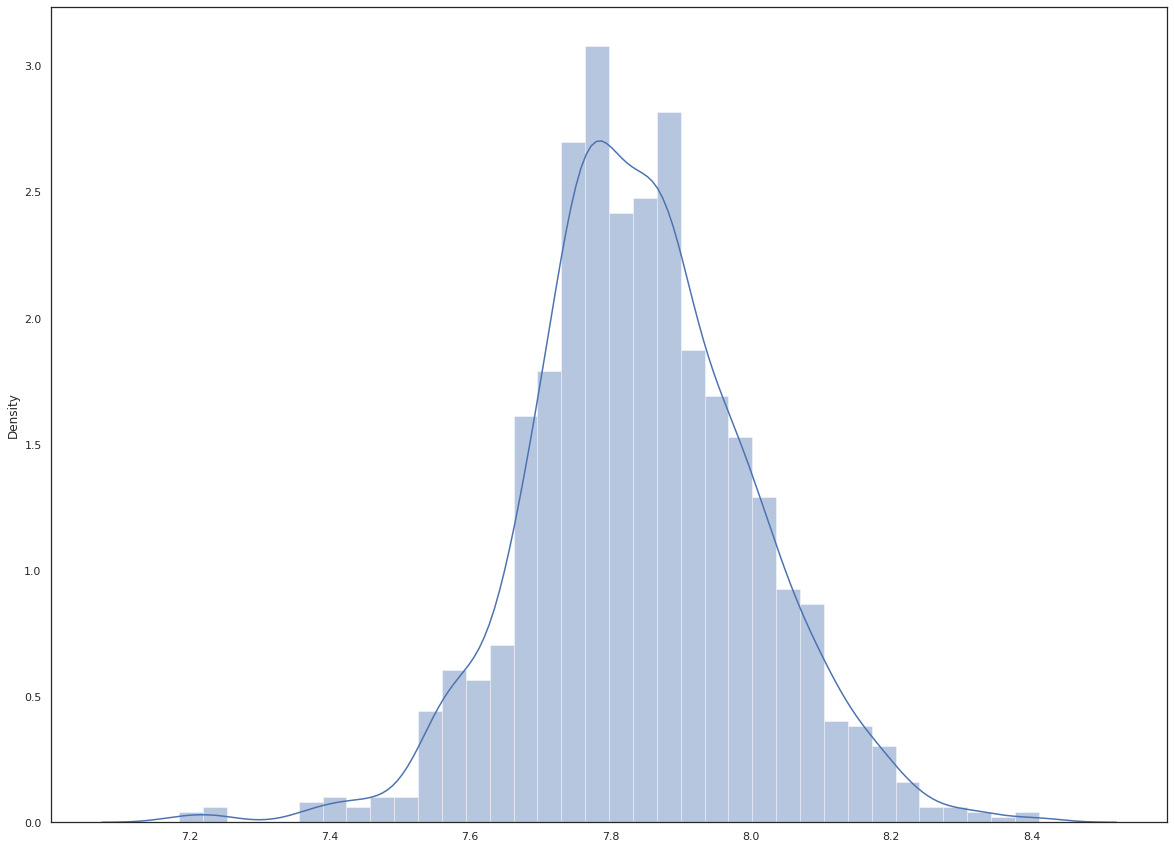

In [ ]:
sns.distplot(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.1, 
    random_state=42
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1314, 75) (1314,) (146, 75) (146,)


In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.score(X_test, y_test)

0.9030315786269627

on validation set we are getting $R^2$ score of **0.9030315786269627**

### Test set prediction

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test = df_test.drop(missing_stats[missing_stats > 50].index, axis = 1)
print(df_test.shape)
df_test.head()

(1459, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [ ]:
for colname in df_test.columns[df_test.dtypes == "object"]:
    _mode = df_org[colname].mode()[0]
    print(colname, "\t", _mode, "\t", df_test[colname].isna().sum())
    df_test[colname] = df_test[colname].fillna(_mode)

MSZoning 	 RL 	 4
Street 	 Pave 	 0
LotShape 	 Reg 	 0
LandContour 	 Lvl 	 0
Utilities 	 AllPub 	 2
LotConfig 	 Inside 	 0
LandSlope 	 Gtl 	 0
Neighborhood 	 NAmes 	 0
Condition1 	 Norm 	 0
Condition2 	 Norm 	 0
BldgType 	 1Fam 	 0
HouseStyle 	 1Story 	 0
RoofStyle 	 Gable 	 0
RoofMatl 	 CompShg 	 0
Exterior1st 	 VinylSd 	 1
Exterior2nd 	 VinylSd 	 1
MasVnrType 	 None 	 16
ExterQual 	 TA 	 0
ExterCond 	 TA 	 0
Foundation 	 PConc 	 0
BsmtQual 	 TA 	 44
BsmtCond 	 TA 	 45
BsmtExposure 	 No 	 44
BsmtFinType1 	 Unf 	 42
BsmtFinType2 	 Unf 	 42
Heating 	 GasA 	 0
HeatingQC 	 Ex 	 0
CentralAir 	 Y 	 0
Electrical 	 SBrkr 	 0
KitchenQual 	 TA 	 1
Functional 	 Typ 	 2
FireplaceQu 	 Gd 	 730
GarageType 	 Attchd 	 76
GarageFinish 	 Unf 	 78
GarageQual 	 TA 	 78
GarageCond 	 TA 	 78
PavedDrive 	 Y 	 0
SaleType 	 WD 	 1
SaleCondition 	 Normal 	 0


In [ ]:
for colname in df_test.columns[df_test.dtypes != "object"]:
    _mean = df_org[colname].mean()
    print(colname, "\t\t", _mode, "\t", df_test[colname].isna().sum())
    df_test[colname] = df_test[colname].fillna(_mean)

Id 		 Normal 	 0
MSSubClass 		 Normal 	 0
LotFrontage 		 Normal 	 227
LotArea 		 Normal 	 0
OverallQual 		 Normal 	 0
OverallCond 		 Normal 	 0
YearBuilt 		 Normal 	 0
YearRemodAdd 		 Normal 	 0
MasVnrArea 		 Normal 	 15
BsmtFinSF1 		 Normal 	 1
BsmtFinSF2 		 Normal 	 1
BsmtUnfSF 		 Normal 	 1
TotalBsmtSF 		 Normal 	 1
1stFlrSF 		 Normal 	 0
2ndFlrSF 		 Normal 	 0
LowQualFinSF 		 Normal 	 0
GrLivArea 		 Normal 	 0
BsmtFullBath 		 Normal 	 2
BsmtHalfBath 		 Normal 	 2
FullBath 		 Normal 	 0
HalfBath 		 Normal 	 0
BedroomAbvGr 		 Normal 	 0
KitchenAbvGr 		 Normal 	 0
TotRmsAbvGrd 		 Normal 	 0
Fireplaces 		 Normal 	 0
GarageYrBlt 		 Normal 	 78
GarageCars 		 Normal 	 1
GarageArea 		 Normal 	 1
WoodDeckSF 		 Normal 	 0
OpenPorchSF 		 Normal 	 0
EnclosedPorch 		 Normal 	 0
3SsnPorch 		 Normal 	 0
ScreenPorch 		 Normal 	 0
PoolArea 		 Normal 	 0
MiscVal 		 Normal 	 0
MoSold 		 Normal 	 0
YrSold 		 Normal 	 0


In [ ]:
df_test[df_test.columns[df_test.dtypes == "object"]] = df_test[df_test.columns[df_test.dtypes == "object"]].apply(lambda x: d[x.name].transform(x))

In [ ]:
### Predicting on test
from scipy.special import inv_boxcox

df = pd.DataFrame()
df['Id'] = df_test['Id']
df['SalePrice'] = reg.predict(df_test.drop('Id', axis = 1))
df['SalePrice'] = inv_boxcox(df['SalePrice'], LAMBDA)

In [ ]:
df.to_csv("rudresh.csv", index = False)

### Lets use Another methods

In [ ]:
df_test_org = pd.read_csv("test.csv")
df_org = pd.read_csv('train.csv')

In [ ]:
df_merged = pd.concat([
    df_org.drop('SalePrice', axis = 1),
    df_test_org
], axis = 0)

In [ ]:
# drop majourity missing values
df_merged = df_merged.drop(missing_stats[missing_stats > 50].index, axis = 1)
print(df_merged.shape)
df_merged.head()

(2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [ ]:
# impute missing values
for colname in df_merged.columns[df_merged.dtypes == "object"]:
    _mode = df_merged[colname].mode()[0]
    print(colname, "\t", _mode, "\t", df_merged[colname].isna().sum())
    df_merged[colname] = df_merged[colname].fillna(_mode)

for colname in df_merged.columns[df_merged.dtypes != "object"]:
    _mean = df_merged[colname].mean()
    print(colname, "\t\t", _mode, "\t", df_merged[colname].isna().sum())
    df_merged[colname] = df_merged[colname].fillna(_mean)

MSZoning 	 RL 	 4
Street 	 Pave 	 0
LotShape 	 Reg 	 0
LandContour 	 Lvl 	 0
Utilities 	 AllPub 	 2
LotConfig 	 Inside 	 0
LandSlope 	 Gtl 	 0
Neighborhood 	 NAmes 	 0
Condition1 	 Norm 	 0
Condition2 	 Norm 	 0
BldgType 	 1Fam 	 0
HouseStyle 	 1Story 	 0
RoofStyle 	 Gable 	 0
RoofMatl 	 CompShg 	 0
Exterior1st 	 VinylSd 	 1
Exterior2nd 	 VinylSd 	 1
MasVnrType 	 None 	 24
ExterQual 	 TA 	 0
ExterCond 	 TA 	 0
Foundation 	 PConc 	 0
BsmtQual 	 TA 	 81
BsmtCond 	 TA 	 82
BsmtExposure 	 No 	 82
BsmtFinType1 	 Unf 	 79
BsmtFinType2 	 Unf 	 80
Heating 	 GasA 	 0
HeatingQC 	 Ex 	 0
CentralAir 	 Y 	 0
Electrical 	 SBrkr 	 1
KitchenQual 	 TA 	 1
Functional 	 Typ 	 2
FireplaceQu 	 Gd 	 1420
GarageType 	 Attchd 	 157
GarageFinish 	 Unf 	 159
GarageQual 	 TA 	 159
GarageCond 	 TA 	 159
PavedDrive 	 Y 	 0
SaleType 	 WD 	 1
SaleCondition 	 Normal 	 0
Id 		 Normal 	 0
MSSubClass 		 Normal 	 0
LotFrontage 		 Normal 	 486
LotArea 		 Normal 	 0
OverallQual 		 Normal 	 0
OverallCond 		 Normal 	 0
YearB

In [ ]:
df_merged.isna().any().any()

False

One-hot Encoding on categorical data

In [ ]:
cat_features = df_merged.columns[df_merged.dtypes == 'object']

df_one_hot = pd.concat([
    df_merged.drop(cat_features, axis = 1),
    pd.get_dummies(df_merged[cat_features])
], axis = 1)

print(df_one_hot.shape)
df_one_hot.head()

(2919, 276)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(df_one_hot.drop("Id", axis = 1))

PCA(n_components=150)

In [ ]:
df_pca = pca.transform(df_one_hot.drop("Id", axis = 1))

In [ ]:
x = df_pca[:len(df_org)]
_y = df_org["SalePrice"]
print(x.shape, _y.shape)

(1460, 150) (1460,)


In [ ]:
y, LAMBDA_2 = boxcox(_y)

In [ ]:
reg2 = LinearRegression()
reg2.fit(x, y)

LinearRegression()

In [ ]:
reg2.predict(df_pca[len(df_org):])

array([7.66662685, 7.80940103, 7.84700348, ..., 7.81408223, 7.70047322,
       7.96889085])

In [ ]:
from scipy.special import inv_boxcox

df = pd.DataFrame()
df['Id'] = df_merged[len(df_org):]["Id"]
df['SalePrice'] = reg2.predict(df_pca[len(df_org):])
df['SalePrice'] = inv_boxcox(df['SalePrice'], LAMBDA_2)

In [ ]:
df.to_csv("rudresh_2.5.csv", index = False)